# Import libraries and packages

In [1]:
# import qiskit library
import qiskit

In [2]:
# for plotting
import matplotlib.pyplot as plt
# for matrix and linear algebra
import numpy as np
# preinstalled dataset
from qiskit.ml.datasets import ad_hoc_data
# basic simulator
from qiskit import BasicAer
# import Quantm Instance to run the experiment
from qiskit.aqua import QuantumInstance
# import quantum feature map
from qiskit.circuit.library import ZZFeatureMap
# import Quantum Support vector Machine model
from qiskit.aqua.algorithms import QSVM
# import several useful unitilies
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
#
print("Necessary libraries and packages are imported successfully!")

Necessary libraries and packages are imported successfully!


# Setup parameters

In [3]:
# feature dimension
feature_dim = 2
# size of the training dataset
trainning_dataset_size = 20
# size of the testing dataset
testing_dataset_size = 10
# set the seeds for the random number generator
random_seed = 42
# set shots/ number of iteration
shot = 10000

# Setup data

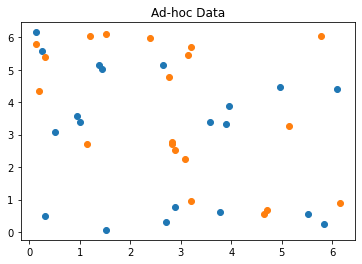

{'A': 0, 'B': 1}


In [4]:
# set the dataset
sample_Total, train_input, test_input, class_labels = ad_hoc_data(training_size=trainning_dataset_size, 
                                                                    test_size=testing_dataset_size, 
                                                                    gap=0.3,
                                                                    n=feature_dim, 
                                                                    plot_data=True)
# "gap": is the assumed gap between dimention in high dimensional space
#
#set the data points
datapoints, class_to_label = split_dataset_to_data_and_labels(train_input)
print(class_to_label)


## The above plot shows the training data: **Ad-hoc-Data**, which will be used to train the QSVM     

# Setup the backend to run the QSVM

In [5]:
# use the qasm simulator
backend = BasicAer.get_backend('qasm_simulator')
# define the feature map
"""
Feature Map: 
    a mapping / transformation process which maps the data points from the original plane or space into a much higher dimensional space.
    
    Arg: 
    reps: The number of repeated circuits
    feature_dimension: Number of features.
"""
feature_map = ZZFeatureMap(feature_dim, reps=2)
# define the QSVM model
qsvm = QSVM(feature_map, train_input, test_input, None)
# set the random seed for this qsvm
qsvm.random_seed = random_seed
# setup the quantum instance to run the experiment
quantum_instance = QuantumInstance(backend, shots=shot, seed_simulator=random_seed, seed_transpiler=random_seed)
# get the result from the above designed experiment on the quantum_instance
result = qsvm.run(quantum_instance)

In [8]:
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


## So, this quantum circuit maps our dataset into a much higher dimensional space.





## Check the 'Kernel Matrix' from the 'result'  

**Kernel Matrix**: a sort of distance between points in higher dimension


  Kernel Matrix during the training:



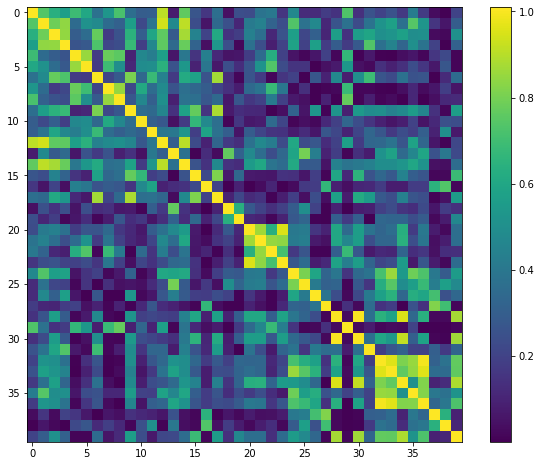

In [9]:
print("\n  Kernel Matrix during the training:\n")
kernel_matrix = result['kernel_matrix_training']
# plot this kernel matrix
plt.figure(figsize=(10, 8))
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='viridis')
plt.colorbar()
plt.show()

## Explanation of this plot  

This plot shows the **kernel matrix** of the training result of the QSVM model/ algorithm. 
First, by applying the quantum feature map, ZZFeatureMap, to remap the dataset into a higher (vector) space. 
Second, calculate the inner product of each possible pair of data points. eg. the inner product of a vector with itself is one. those points at the diagonal are exactly the amplitude of an inner product of each vector with itself,i.e, |<1|1>|^2 = 1.0 ,  |<2|2>|^2 = 1.0,  |<19|19>|^2 = 1.0 , etc. Those dark points with value of zero correspond to the inner product of two orthogonal vectors. 

# Prediction

In [7]:
predicted_labels = qsvm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, qsvm.label_to_class)
print("Ground truth: {}".format(datapoints[1]))
print("Prediction: {}".format(predicted_labels))
# prediction accuracy
print("testing success ration: {}".format(result['testing_accuracy']))

Ground truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
testing success ration: 1.0
